In [1]:
# All the necesssary imports.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Activation, Dropout
from keras.layers import LeakyReLU
from keras import initializers
from keras.datasets import mnist
from keras.optimizers import Adam, RMSprop, SGD
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Load in the data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize to [-1, 1] (easier to work with)
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

# For the sake of time don't work with the entire dataset.
x_train = x_train[:10000]
y_train = x_train[:10000]

# Flatten the data.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

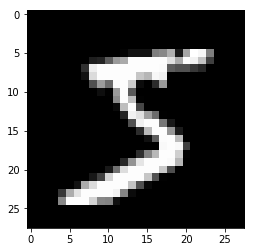

In [3]:
# Plot out a sample image (reshaped to 28 x 28)
plt.imshow(x_train[0].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
# How many noise dimensions our generator should take in
NOISE_DIM = 100 # Feel free to tweak this and see what changes


def generator():
    ###################################
    #TODO: Implement
    model = Sequential()
    model.add(Dense(256, input_dim = NOISE_DIM, kernel_initializer = initializers.RandomNormal(stddev = 0.02)))
    model.add(LeakyReLU(0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))   
    model.add(Dense(784, activation = 'tanh'))
    return model
    ###################################

In [5]:
def discriminator():
    ###################################
    #TODO: Implement
    model = Sequential()
    model.add(Dense(1024,input_shape=(784,), kernel_initializer = initializers.RandomNormal(stddev = 0.02)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model
    ###################################

In [6]:
def combine(generator, discriminator):
    ###################################
    # TODO: Implement
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model
    ###################################

In [7]:
# Compile the discriminator, generator, and full GAN. 

# Use this optimizer for each of the models
opt = Adam(lr=.0002, beta_1=0.5)
loss = 'binary_crossentropy'
#############################################
# TODO: Compile generator and discriminator
d = discriminator()
d.compile(loss = loss, optimizer = opt)

g = generator()
g.compile(loss = loss, optimizer = opt)

gd = combine(g, d)
gd.compile(loss = loss, optimizer = opt)
#############################################

In [8]:
# Helper function to display sample from the network
def disp_sample(g):
    noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
    generated_images = g.predict(noise, verbose=0)
    show_im = generated_images[0]
    show_im = (show_im + 1) / 2.0
    show_im = show_im.reshape(28, 28)
    plt.imshow(show_im, cmap='gray')
    plt.show()

Epoch #0


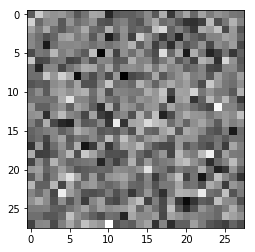

Number batches 78
0(0/78) D: 0.8585, G: 0.6954
0(1/78) D: 0.4596, G: 0.6804
0(2/78) D: 0.3833, G: 0.6640
0(3/78) D: 0.3850, G: 0.6447
0(4/78) D: 0.3962, G: 0.6234
0(5/78) D: 0.4127, G: 0.6045
0(6/78) D: 0.4308, G: 0.5918
0(7/78) D: 0.4440, G: 0.5847
0(8/78) D: 0.4502, G: 0.5971
0(9/78) D: 0.4458, G: 0.6269
0(10/78) D: 0.4396, G: 0.6750
0(11/78) D: 0.4287, G: 0.7180
0(12/78) D: 0.4161, G: 0.7544
0(13/78) D: 0.4059, G: 0.7643
0(14/78) D: 0.4139, G: 0.8022
0(15/78) D: 0.4203, G: 0.8183
0(16/78) D: 0.4476, G: 0.7143
0(17/78) D: 0.4835, G: 0.7920
0(18/78) D: 0.4827, G: 0.7174
0(19/78) D: 0.4796, G: 0.8227
0(20/78) D: 0.4475, G: 0.8312
0(21/78) D: 0.4318, G: 0.8397
0(22/78) D: 0.4402, G: 0.9201
0(23/78) D: 0.4382, G: 0.8504
0(24/78) D: 0.4522, G: 0.9382
0(25/78) D: 0.4487, G: 0.7636
0(26/78) D: 0.5103, G: 0.9318
0(27/78) D: 0.4705, G: 0.8086
0(28/78) D: 0.4610, G: 0.9154
0(29/78) D: 0.4318, G: 0.9368
0(30/78) D: 0.4194, G: 0.9083
0(31/78) D: 0.4264, G: 0.9880
0(32/78) D: 0.4018, G: 0.9586
0(

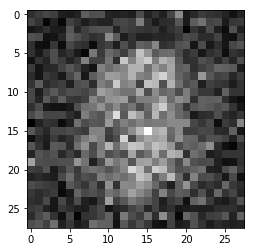

Number batches 78
1(0/78) D: 0.4720, G: 0.8896
1(1/78) D: 0.4631, G: 1.2212
1(2/78) D: 0.4567, G: 0.9376
1(3/78) D: 0.4944, G: 1.4017
1(4/78) D: 0.5203, G: 0.6102
1(5/78) D: 0.6352, G: 1.2515
1(6/78) D: 0.4919, G: 0.9599
1(7/78) D: 0.4174, G: 1.0720
1(8/78) D: 0.3847, G: 1.3358
1(9/78) D: 0.3243, G: 1.3966
1(10/78) D: 0.3272, G: 1.6463
1(11/78) D: 0.3691, G: 0.9356
1(12/78) D: 0.5467, G: 1.9213
1(13/78) D: 0.8563, G: 0.3403
1(14/78) D: 0.7627, G: 0.4166
1(15/78) D: 0.6246, G: 0.7472
1(16/78) D: 0.3793, G: 1.0487
1(17/78) D: 0.3291, G: 1.2348
1(18/78) D: 0.3325, G: 1.0972
1(19/78) D: 0.2839, G: 1.0963
1(20/78) D: 0.2758, G: 1.3913
1(21/78) D: 0.2557, G: 1.5169
1(22/78) D: 0.2766, G: 1.2563
1(23/78) D: 0.3527, G: 1.2433
1(24/78) D: 0.4093, G: 0.9852
1(25/78) D: 0.4728, G: 1.2353
1(26/78) D: 0.4476, G: 0.6849
1(27/78) D: 0.5452, G: 1.1866
1(28/78) D: 0.3379, G: 1.4057
1(29/78) D: 0.3583, G: 0.9483
1(30/78) D: 0.3925, G: 1.1770
1(31/78) D: 0.2954, G: 1.5184
1(32/78) D: 0.2906, G: 1.2991
1(

In [ ]:
batch_size = 128

for epoch in range(100):
    print('Epoch #%d' % epoch)
    
    # Generate an image and display it.
    disp_sample(g)
    
    num_batches = int(x_train.shape[0] / batch_size)
    print('Number batches %i' % num_batches)
    for i in range(num_batches):
        # A training iteration
        
        # Generate noise.
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
        
        # Generate images from the noise using the generator.
        generated_images = g.predict(noise)
        
        # Grab the image batch for this iteration. 
        real_images = x_train[i * batch_size: (i+1) * batch_size]
        
        # Contains the real and fake images.
        X = np.concatenate([generated_images, real_images])
        
        # Labels if the sample is real (1) or not real (0). 
        y = np.concatenate([np.zeros(generated_images.shape[0]), np.ones(real_images.shape[0])])

        # Train the discriminator using the generated images and the real images.
        d.trainable = True
        d_loss = d.train_on_batch(X, y)
        d.trainable = False
        
        # Generate more noise to feed into the full gan network to train the generative portion. 
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))

        # Get the g_loss
        g_loss = gd.train_on_batch(noise, np.ones(noise.shape[0]))
        
        print('%i(%i/%i) D: %.4f, G: %.4f' % (epoch, i, num_batches, d_loss, g_loss))